In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt

# Dimension reduction with PCA
In this exercise, we use the [census crime data](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/censusCrimeClean.csv) that we've used before..

We will be doing some PCA on these data. PCA is about dimension-reduction so we will creating synthetic variables that try to capture most variation and studying the contributions of each variable to this. To remind you, each row (sample/record) is a "community" (small geographical region) with census data (and crime) recorded.

Using real and messy data often makes the interpretation more difficult. In this exercise, you will see first-hand an example of what happens if we include some invalid features.

1. Load the data (above) in a DataFrame.
2. Since PCA only works with numerical data, extract all the data except the first column (which is text) and store as a variable.
3. Create and fit PCA with two components with these features
4. Look at the `explained_variance_ratio_`. How much of the variation are these two components capturing? Try standardising the variables and see what effect that has. Standardising scales the variables so they all have the same variance. This is [usually recommended for PCA](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py), because it ensure all variables considered with the same weighing. But in our case, the variables are all percentages, so it may be less important. Comment on how much of the variation is captured into these two variables.
5. [Transform](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) the samples into the principal components and plot them on a scatterplot. Each dot (sample) is a "community" (small geographical region). How does this look?
6. Look at the loadings. The `components_` attributes contains the loadings that give the contribution of each feature on the principal component (listed in the same order as the column order). I suggest you:
    - put them in a panda dataframe with the original column headings as the headings
    - transpose so that the rows are the features and the columns are the components
    - convert the values to absolute values (remove the sign, we don't need it)
    - sort by the (absolute) loadings in the first column
    These will tell you which variables most strongly contribute. You will see that one massively dominates and this may help you interpret the scatterplot. Have a look at the variable. Why should be not be using it?
7. Repeat with this variable removed.
8. As an extra - plot the samples in the principal component space (like before). Colour the points by `ViolentCrimesPerPop`. In which principal components does this vary? Look at the loadings - which variables seem to relate to this? Note that this is not a great way to analyse this, just a by-product of what we have done.

In [2]:
census_df = pd.read_csv("censusCrimeClean.csv", header = 0)
census_df.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
# Store the data without first column (since it is a text)
features = census_df.iloc[:,1:]

# More simple way
# df.drop(labels='communityname', axis=1)

# Check
features.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [9]:
# Create PCA object with 2 components
pca = PCA(n_components=2)

# Fit the components
pca.fit(features)

PCA(n_components=2)

In [10]:
# Statistical measure of how much variation in a dataset can be 
# attributed to each of the principal components (eigenvectors) 
# generated by the principal component analysis (PCA) method
pca.explained_variance_

array([8.26130789, 1.08655844])

In [12]:
# Samething, but normalised
pca.explained_variance_ratio_

array([0.67387831, 0.08863102])

The first component captures 67% of the variance. That's not bad for one variable! The second component captures very little. That's a bit suspicous, because it suggests that all the many of the variables are covariant. Let's plot them and look at the loadings.

In [14]:
# Project the features into these principle components
projectedAxes = pca.transform(features)
projectedAxes

array([[-4.48530725,  0.43431296],
       [-4.50077071, -0.15767396],
       [-4.50207835, -0.54852738],
       ...,
       [ 4.49526516, -0.62984225],
       [ 4.5111374 ,  0.45542623],
       [ 4.50790382, -0.50107753]])

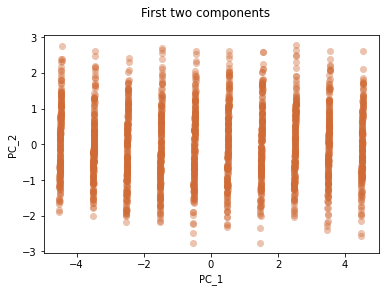

In [16]:
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0);

Looks distinctly weird! This often happens when a categorical or highly structure variable is included in the mix. Component 1 looks like it's dominated by a discrete variable. Let's look at the loadings to investigate further.

In [18]:
# Get the loadings dataframe
loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[1:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by=0,ascending=False)
loadings

,0,1
fold,0.999788,0.016430
pctUrban,0.004944,0.146079
PctOccupManu,0.004403,0.132659
RentHighQ,0.004078,0.188187
medIncome,0.003932,0.185649
...,...,...
PctForeignBorn,0.000076,0.024639
racepctblack,0.000066,0.130905
racePctAsian,0.000064,0.061561
PctUsePubTrans,0.000037,0.036078


One variable dominates: `fold`

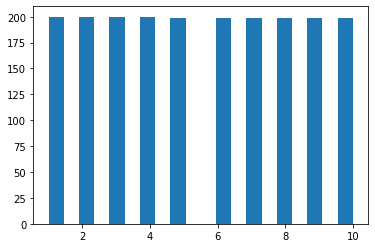

In [19]:
plt.hist(census_df['fold'],bins=20);

This is clearly a rogue variable that isn't really a census variable. So let's drop it.

[1.0884979  0.75511529]
[0.27204086 0.18872082]


,0,1
PctHousNoPhone,0.197953,0.011821
PctPopUnderPov,0.190608,0.031635
RentHighQ,0.188423,0.136248
medIncome,0.185822,0.040774
PctYoungKids2Par,0.178807,0.017237
...,...,...
pctWRetire,0.005575,0.068609
PctRecImmig8,0.002027,0.255064
PctRecentImmig,0.001797,0.248239
PctRecImmig5,0.000901,0.252463


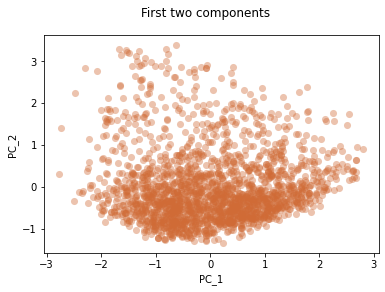

In [20]:
features = census_df.iloc[:,2:]
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[2:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
loadings

This PCA looks more like as we would expect. The previous one was totally dominated by a discrete variable that was just an artefact of our data. We explain much less of the variation now, but the variation is better spread between the two principal components.

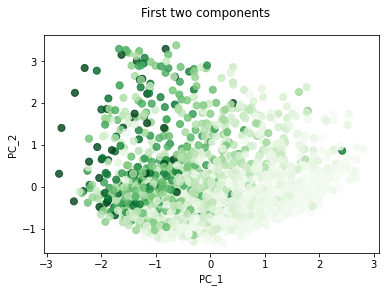

In [22]:
# Colour the points by ViolentCrimesPerPop
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = census_df['ViolentCrimesPerPop'], cmap = plt.cm.Greens, s = 50, alpha = 0.8);

The first principle component seems to broadly distinguish areas with high crime, so the loadings on the first component are likely to be discriminating of this.

However, as mentioned this is not a great way to analyse crime, we just consider it as a by-product of what we have done.